In [1]:
from fastai.vision.all import *
from fastbook import *

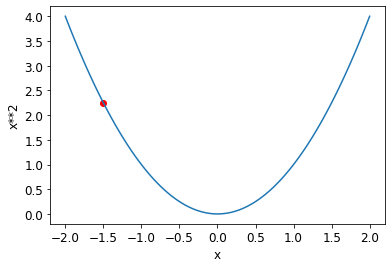

In [2]:
def f(x): return x**2

plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [3]:
xt = tensor(3.).requires_grad_() # tensor with the value 3, allow the computation of gradient
yt = f(xt) # 9
yt.backward() #backpropagation, which is the process of calculating derivatives of each layer

In [4]:
xt.grad # d(x**2) = 2*x, 2*3=6

tensor(6.)

In [5]:
def f(x): return (x**2).sum()

In [6]:
xt = tensor([3.,4.,10.]).requires_grad_()
yt = f(xt)
yt.backward()

xt.grad

tensor([ 6.,  8., 20.])

In [7]:
#------------ Example ------------#

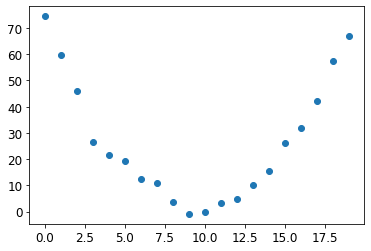

In [8]:
time  = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed);

In [9]:
# we can't consider every possible function for SDG, 
# so let it be function of the form a*(time**2)+(b*time**2)+c
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

# to find the best quadratic function, 
# we need to find only the best values for a, b, and c

In [10]:
# loss function, calculate mean squared error
def mse(preds, targets): return ((preds-targets)**2).mean()

In [11]:
#------------ 7 step learning process ------------#

In [12]:
# step 1: initialize the parameters
params = torch.randn(3).requires_grad_() #3 random values

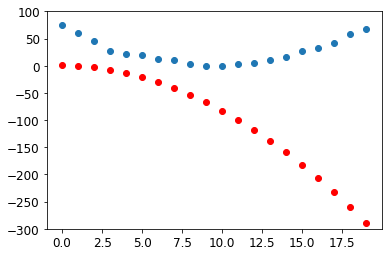

In [13]:
# step 2: calculate the predictions
preds = f(time, params)

#visualization
def show_preds(preds, ax=None):
    if ax is None:
        ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

show_preds(preds)

In [14]:
# step 3: calculate loss
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [15]:
# step 4: calculate gradients
loss.backward()
params, params.grad

(tensor([-0.7658, -0.7506,  1.3525], requires_grad=True),
 tensor([-53195.8633,  -3419.7148,   -253.8908]))

In [16]:
# step 5: step the weights
lr = 1e-
params.data -= lr * params.grad.data
params.grad = None

MSE:5435.53564453125


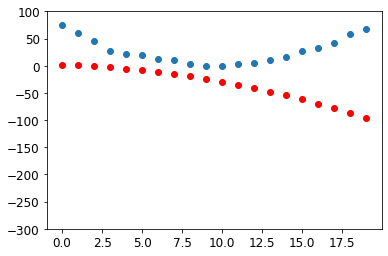

In [17]:
# check improvement
preds = f(time, params)
print('MSE:{}'.format(mse(preds, speed)))

show_preds(preds)

In [18]:
# step 6: repeat the process
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: 
        print(loss.item())
        
    return preds

In [19]:
for i in range(10):
    apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


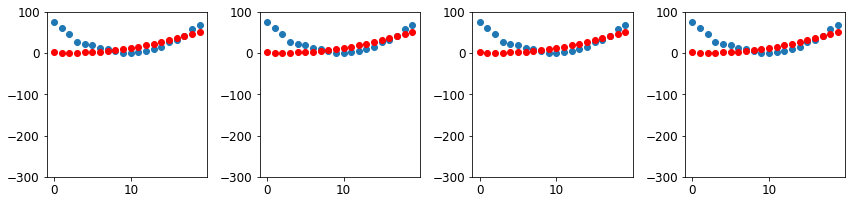

In [22]:
# check the evolution
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: 
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [21]:
# step 7: Stop
# we just stopped after 10 iterations, in practice metrics decide when to stop